In [46]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.integrate as integrate
import seaborn as sns

# 2021-08-20 Puzzler Express

We can simplify this down to a single random variable $X$, defined as the angle between the cricket's first 1 foot jump and its second.

$$X \sim \mathrm{Uniform}(0, 2\pi)$$

This has a PDF of $f(x)$:

$$f(x) = \begin{cases}
\frac{1}{2\pi} & \text{if } 0 \leq x \leq 2\pi \\
0              & \text{otherwise}
\end{cases}$$

The CDF is given by:

$$P(a \leq X \leq b) = \int_a^b{f(x) dx}$$

We can transform this random variable to a new one $Y$ by defining a transformation function $y(x)$:

$$P(y(a) \leq Y \leq y(b)) = P(a \leq X \leq b) = \int^{y(b)}_{y(a)}{f(x(y))\frac{dx}{dy}dy}$$

If the transformation function is either monotonically increasing or decreasing, we can define the PDF of the new variable as:

$$g(y) = f(x(y))\left\lvert\frac{dx}{dy}\right\rvert$$

We define this tranformation function as $y(x)$, which is the distance the cricket will be from its starting position after the second jump:

$$\begin{align}
    y(x) & = \sqrt{(\cos{x} + 1)^2 + (\sin{x})^2} \\
         & = \sqrt{(\cos{x})^2 + 2\cos{x} + 1 + (\sin{x})^2} \\
         & = \sqrt{2\cos{x} + 2}
\end{align}$$

This inverts to:

$$\begin{align}
y(x) = & \sqrt{2\cos{x} + 2} \\
x(y) = & \arccos{\frac{y^2}{2} - 1} \\
\end{align}$$

Unfortunately, this transformation function is not monotonic, and the inverted function x(y) has two values:

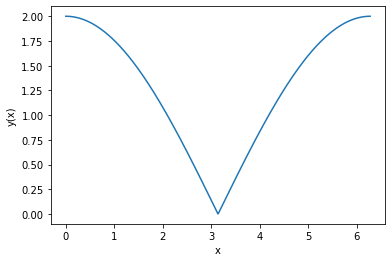

In [29]:
x=np.arange(0, 2*math.pi, 0.01)
plt.plot(x, np.sqrt(2*np.cos(x)+2))
plt.xlabel("x")
plt.ylabel("y(x)")
plt.show()

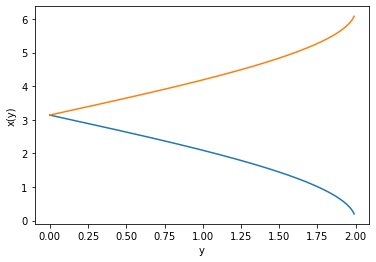

In [54]:
y=np.arange(0, 2, 0.01)
plt.plot(y, np.arccos(y*y/2-1))
plt.plot(y,2*math.pi-np.arccos(y*y/2-1))
plt.xlabel("y")
plt.ylabel("x(y)")
plt.show()

But the two halves over the ranges $[0, \pi]$ and $[\pi, 2\pi]$ *are*, so we can essentially double the value of $|\frac{dx}{dy}|$. This will handle the case of both halves of the domain of $X$ (i.e. whether the cricket turns left or right).

Calculating the derivative:

$$\begin{align}
\frac{dx}{dy} = & -\frac{y}{\sqrt{1 - (\frac{y^2}{2} - 1)^2}} \\
\left\lvert\frac{dx}{dy}\right\rvert = & \frac{y}{\sqrt{1 - (\frac{y^2}{2} - 1)^2}}
\end{align}$$

Then we can find $g(y)$:

$$\begin{align}
g(y) = & f(x(y)) 2 \left\lvert\frac{dx}{dy}\right\rvert \\
     = & \frac{1}{2\pi} 2 \frac{y}{\sqrt{1 - (\frac{y^2}{2} - 1)^2}} \\
     = & \frac{1}{\pi} \frac{y}{\sqrt{1 - (\frac{y^2}{2} - 1)^2}}
\end{align}$$

This gives us a proper new PDF for the transformed variable, with the right domain of $[0, 2]$, with an area of 1.0 under the curve for that domain:

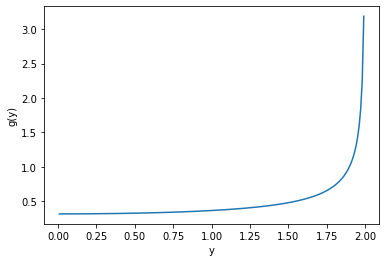

In [33]:
y=np.arange(0.01, 2, 0.01)
#plt.plot(y, np.arccos((y*y)/2 - 1))
plt.plot(y, y/math.pi/np.sqrt(1-np.square(y*y/2 - 1)))
plt.xlabel('y')
plt.ylabel('g(y)')
plt.show()

In [26]:
integrate.quad(lambda y: y/math.sqrt(1-((y*y)/2-1)**2)/(math.pi), 0, 2)

(0.9999999999999889, 3.457711894583326e-11)

The peak of this PDF is at the end of the domain at 2.0. This agrees with numerical simulations:

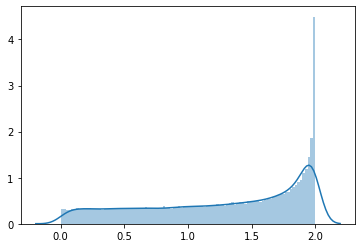

In [45]:
X = np.random.uniform(0.0, 2*math.pi, size=100000)
Y = np.sqrt(2*np.cos(X)+2)
sns.distplot(Y, bins=100)
plt.show()